In [223]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
turnos_por_gen = 1000
generaciones = 500
estrategias = {
    "Azarosa" : (estrat_proponer_rand, estrat_aceptar_rand, 20),
    "Mala_onda" : (estrat_proponer_rand, estrat_aceptar_nunca, 20),
    "Promedio" : (estrat_proponer_promedio, estrat_aceptar_promedio, 20),
    "Rata" : (estrat_rata, estrat_aceptar_siempre, 20),
    "Antirrata" : (estrat_antirrata_proponer, estrat_antirrata_aceptar, 20),
    }
n_agentes = 100
n_aristas = n_agentes * (n_agentes- 1) / 2
grafo = create_random_adjacency_list(n_agentes, n_aristas)

In [225]:
ecologico = Ecologico(turnos_por_gen, generaciones, estrategias, n_agentes, grafo)

In [226]:
historial_estrategias = ecologico.competir()

#for estrat in historial_estrategias:
#    ecologico.print_poblaciones(estrat)
data = [{key: value[2] for key, value in dic.items()} for dic in historial_estrategias]

In [227]:
df = pd.DataFrame(data)

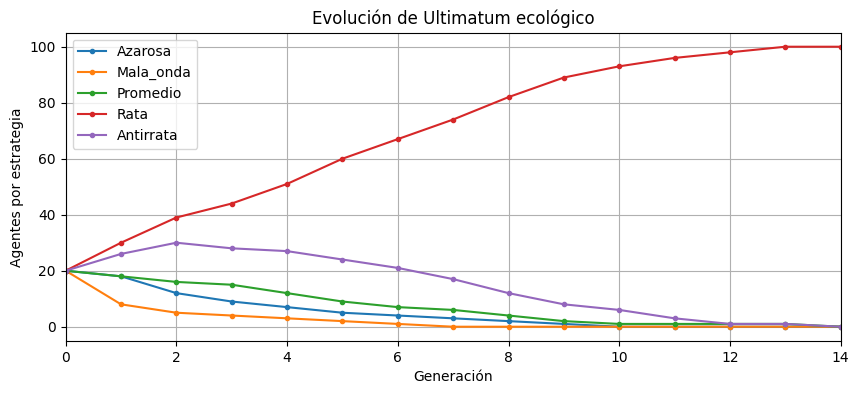

In [228]:
plt.figure(figsize=(10, 4))
end = None
for estrategia in df.columns:
    plt.plot(df.index, df[estrategia], marker='.', label=estrategia)
    if end is None:  # Solo si aún no hemos encontrado un n_agentes
        idx_n = df[estrategia][df[estrategia] == n_agentes].index
        if not idx_n.empty:
            end = idx_n[0]
            
if end == None:
    end = ecologico.n_generaciones

plt.xlim([0,end+1])
plt.xlabel('Generación')
plt.ylabel('Agentes por estrategia')
plt.title('Evolución de Ultimatum ecológico')
plt.legend()
plt.grid(True)
plt.show()